1. Original Soybean price from Brizal

In [1]:
import pandas as pd
import numpy as np


def read_data(file_path):
    """Reads the CSV data file into a pandas DataFrame."""
    return pd.read_excel(file_path, parse_dates=['Date'], index_col='Date', header=3)

file_path = '../data/soybean.xls'
data = read_data(file_path)
data.head()

,Price
Date,
2006-03-13,12.96
2006-03-14,12.91
2006-03-15,13.00
2006-03-16,12.78
2006-03-17,12.68


2. Check for missing holiday and weekend data

In [ ]:
def check_missing_dates(data):
    """Checks for missing dates in the DataFrame index."""
    all_dates = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
    missing_dates = all_dates.difference(data.index)
    return missing_dates
missing_dates = check_missing_dates(data)
print("Missing Dates:", missing_dates)

Missing Dates: DatetimeIndex(['2006-03-18', '2006-03-19', '2006-03-25', '2006-03-26',
               '2006-04-01', '2006-04-02', '2006-04-08', '2006-04-09',
               '2006-04-14', '2006-04-15',
               ...
               '2025-09-13', '2025-09-14', '2025-09-20', '2025-09-21',
               '2025-09-27', '2025-09-28', '2025-10-04', '2025-10-05',
               '2025-10-11', '2025-10-12'],
              dtype='datetime64[ns]', length=2270, freq=None)


In [5]:
# fill missing dates with NaN values
data_with_na = data.asfreq('D')
data_with_na.head(10)
data_with_na = data_with_na['2020-09-30':'2025-09-30']

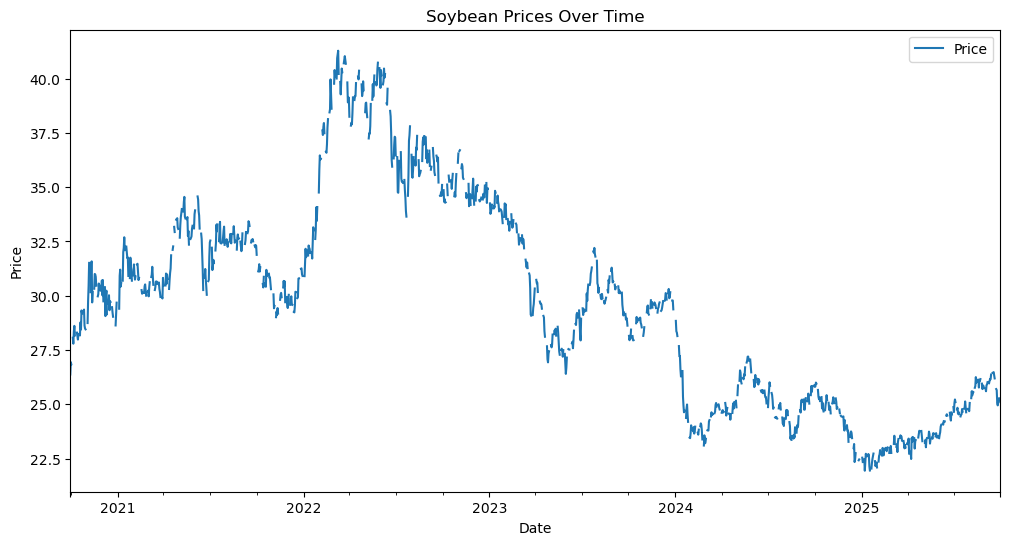

In [6]:
# visualize the data
import matplotlib.pyplot as plt
data_with_na.plot(figsize=(12, 6))
plt.title('Soybean Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [8]:
# read the exogenous variables
weather_data = pd.read_csv('../data/exogenous_data/brazil_soybean_weather_2015_2025.csv', parse_dates=['date'], index_col='date')
weather_data.head()
# extract relevant period
weather_data = weather_data['2020-09-30':'2025-09-30']
weather_data.tail()
# merge with soybean price data
merged_data = data_with_na.merge(weather_data, left_index=True, right_index=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-09-30 to 2025-09-30
Freq: D
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  1248 non-null   float64
 1   rain_Paranagua_PR      1827 non-null   float64
 2   temp_Paranagua_PR      1827 non-null   float64
 3   rain_MatoGrosso_MT     1827 non-null   float64
 4   temp_MatoGrosso_MT     1827 non-null   float64
 5   rain_Goias_GO          1827 non-null   float64
 6   temp_Goias_GO          1827 non-null   float64
 7   rain_MatoGrossoSul_MS  1827 non-null   float64
 8   temp_MatoGrossoSul_MS  1827 non-null   float64
 9   rain_RioGrandeSul_RS   1827 non-null   float64
 10  temp_RioGrandeSul_RS   1827 non-null   float64
dtypes: float64(11)
memory usage: 171.3 KB


In [9]:
brent_oil_data = pd.read_csv('../data/exogenous_data/brent_oil_futures.csv', parse_dates=['Date'], index_col='Date',header=0)
brent_oil_data.index = pd.to_datetime(brent_oil_data.index, utc=True).normalize().tz_localize(None)
brent_oil_data = brent_oil_data['2020-09-30':'2025-09-30']
brent_oil_data = brent_oil_data.asfreq('D')
# extract Date and Close columns and set Close to brent_oil column
brent_oil_data = brent_oil_data[['Close']]
# set column name to brent_oil
brent_oil_data.columns = ['brent_oil']
merged_data = merged_data.merge(brent_oil_data, left_index=True, right_index=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-09-30 to 2025-09-30
Freq: D
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  1248 non-null   float64
 1   rain_Paranagua_PR      1827 non-null   float64
 2   temp_Paranagua_PR      1827 non-null   float64
 3   rain_MatoGrosso_MT     1827 non-null   float64
 4   temp_MatoGrosso_MT     1827 non-null   float64
 5   rain_Goias_GO          1827 non-null   float64
 6   temp_Goias_GO          1827 non-null   float64
 7   rain_MatoGrossoSul_MS  1827 non-null   float64
 8   temp_MatoGrossoSul_MS  1827 non-null   float64
 9   rain_RioGrandeSul_RS   1827 non-null   float64
 10  temp_RioGrandeSul_RS   1827 non-null   float64
 11  brent_oil              1259 non-null   float64
dtypes: float64(12)
memory usage: 185.6 KB


In [10]:
# read cbot data
cbot_data = pd.read_csv('../data/exogenous_data/cbot_soybean_futures.csv', parse_dates=['Date'], index_col='Date', header=0)
cbot_data.index = pd.to_datetime(cbot_data.index, utc=True).normalize().tz_localize(None)
cbot_data = cbot_data['2020-09-30':'2025-09-30']
cbot_data = cbot_data.asfreq('D')
# extract Date and Close columns and set Close to cbot_soybean column
cbot_data = cbot_data[['Close']]
# set column name to cbot_soybean
cbot_data.columns = ['cbot']
merged_data = merged_data.merge(cbot_data, left_index=True, right_index=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-09-30 to 2025-09-30
Freq: D
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  1248 non-null   float64
 1   rain_Paranagua_PR      1827 non-null   float64
 2   temp_Paranagua_PR      1827 non-null   float64
 3   rain_MatoGrosso_MT     1827 non-null   float64
 4   temp_MatoGrosso_MT     1827 non-null   float64
 5   rain_Goias_GO          1827 non-null   float64
 6   temp_Goias_GO          1827 non-null   float64
 7   rain_MatoGrossoSul_MS  1827 non-null   float64
 8   temp_MatoGrossoSul_MS  1827 non-null   float64
 9   rain_RioGrandeSul_RS   1827 non-null   float64
 10  temp_RioGrandeSul_RS   1827 non-null   float64
 11  brent_oil              1259 non-null   float64
 12  cbot                   1257 non-null   float64
dtypes: float64(13)
memory usage: 199.8 KB


In [11]:
# read USD exchange rate data
usd_data = pd.read_csv('../data/exogenous_data/USD_BRL Historical Data.csv', parse_dates=['Date'], index_col='Date', header=0)
usd_data.index = pd.to_datetime(usd_data.index, utc=True).normalize().tz_localize(None)
usd_data.sort_index(inplace=True)
usd_data = usd_data['2020-09-30':'2025-09-30']
usd_data = usd_data.asfreq('D')
# extract Date and Close columns and set Close to usd_brl column
usd_data = usd_data[['Price']]
usd_data.columns = ['usd_brl']
merged_data = merged_data.merge(usd_data, left_index=True, right_index=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-09-30 to 2025-09-30
Freq: D
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  1248 non-null   float64
 1   rain_Paranagua_PR      1827 non-null   float64
 2   temp_Paranagua_PR      1827 non-null   float64
 3   rain_MatoGrosso_MT     1827 non-null   float64
 4   temp_MatoGrosso_MT     1827 non-null   float64
 5   rain_Goias_GO          1827 non-null   float64
 6   temp_Goias_GO          1827 non-null   float64
 7   rain_MatoGrossoSul_MS  1827 non-null   float64
 8   temp_MatoGrossoSul_MS  1827 non-null   float64
 9   rain_RioGrandeSul_RS   1827 non-null   float64
 10  temp_RioGrandeSul_RS   1827 non-null   float64
 11  brent_oil              1259 non-null   float64
 12  cbot                   1257 non-null   float64
 13  usd_brl                1305 non-null   float64
dtypes: float64(14)
memory usage: 2

In [12]:
merged_data.to_csv('../data/complete_raw_data.csv')